In [11]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
import string
from PyPDF2 import PdfReader
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multidict as multidict

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# python -m nltk.downloader stopwords
# python -m nltk.downloader wordnet

In [95]:
def clean_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove trailing spaces and convert to lowercase
    text = text.strip().lower()
    
    # Remove stop words, custom ignore words, and words with length <= 3
    stop_words = set(stopwords.words('english'))
    ignore_words = set(['xplore', 'wwwnaturecomnatcomputsci', 'septerber', 'author', 'license', 'nature', 'fernandes', 'iia', 'icsa', 'arxiv', 'springer', 'ieee', 'doi', 'unal', 'authorized', 'exclusive', 'switzerland', 'shepperd', 'ed', 'posteriori', 'restriction', 'ccis', 'yes', 'fig', 'vol', 'utc', 'httpsdoiorg', 'lnsc', 'quatic', 'rst', 'universidad', 'nacional', 'colombia', 'use', 'limited', 'licensed', 'april', 'downloaded', 'click'])
    stop_words.update(ignore_words)

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) >= 3]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

pdf_directory = "./pdf"
pdf_texts = []

for pdf_file in os.listdir(pdf_directory):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(pdf_directory, pdf_file)
        reader = PdfReader(pdf_path)
        full_text = ""
        for page in reader.pages:
            full_text += page.extract_text()
        cleaned_text = clean_text(full_text)
        pdf_texts.append(cleaned_text)

df = pd.DataFrame({"full_text": pdf_texts})
df

,full_text
0,quantum computing platform assessing impact qu...
1,research quality model quantum simulator softw...
2,owards set metric quantum circuit understandab...
3,size structure metric quantum software jianjun...
4,jos maria guilherme travassosvalentina lenardu...
5,copyright paper author permitted creative comm...
6,volsoftware quality journal httpsdoiorgsy quan...
7,perspective http doiorgsinformation science lo...
8,exploratory study challenge engineering quantu...
9,martin fernando brito abreualberto rodrigues s...


In [97]:
csv_file_path = "pdf_full_texts.csv"
df.to_csv(csv_file_path, index=False)

In [99]:
def process_text(text, number_of_words=0):
    # Split words
    words = text.split(' ')

    # create phrases
    if (number_of_words > 1):
        words = [' '.join(words[i: i + number_of_words]) for i in range(len(words) - number_of_words + 1)]

    return words

def create_word_cloud(text, title, min_occurrence=2, number_of_words=0):
    fullTermsDict = multidict.MultiDict()
    words = process_text(text, number_of_words)

    freq_dict = {}
    for word in words:
        freq_dict[word] = freq_dict.get(word, 0) + 1

    for key in freq_dict:
        occurrence = freq_dict[key]
        if (occurrence >= min_occurrence):
            fullTermsDict.add(key, occurrence)

    wc = WordCloud(background_color='white', width=800, height=400)
    wc.generate_from_frequencies(fullTermsDict)

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [101]:
merged_text = ' '.join(df['full_text'])

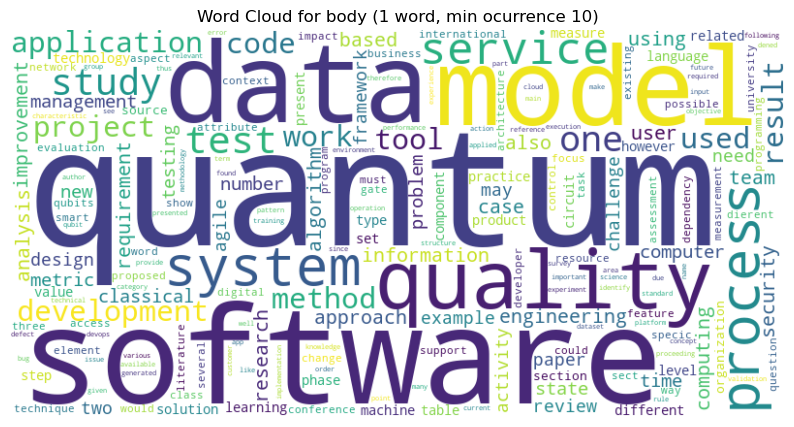

In [103]:
# Word cloud for single word title
create_word_cloud(merged_text, 'Word Cloud for body (1 word, min ocurrence 10)', min_occurrence=10, number_of_words=1)

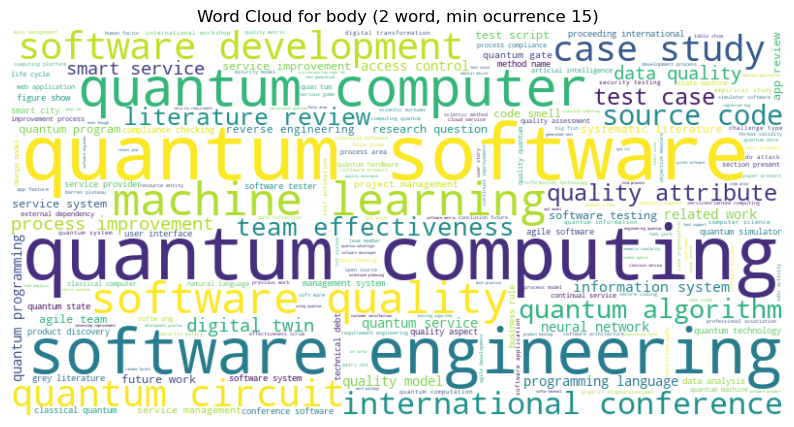

In [105]:
# Word cloud for single word title
create_word_cloud(merged_text, 'Word Cloud for body (2 word, min ocurrence 15)', min_occurrence=15, number_of_words=2)

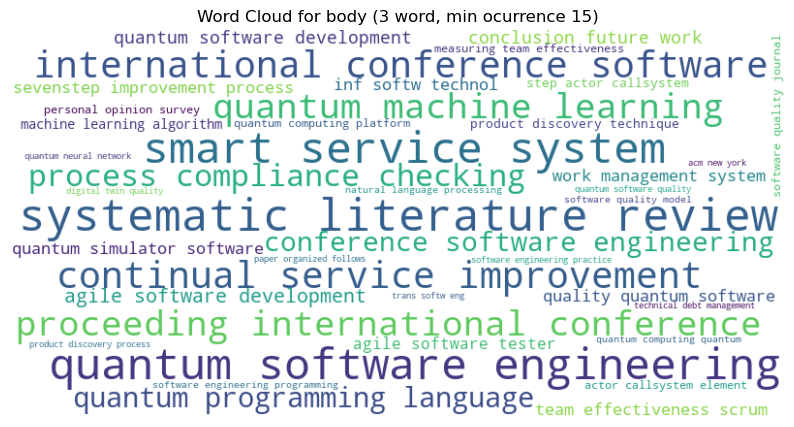

In [107]:
create_word_cloud(merged_text, 'Word Cloud for body (3 word, min ocurrence 15)', min_occurrence=15, number_of_words=3)

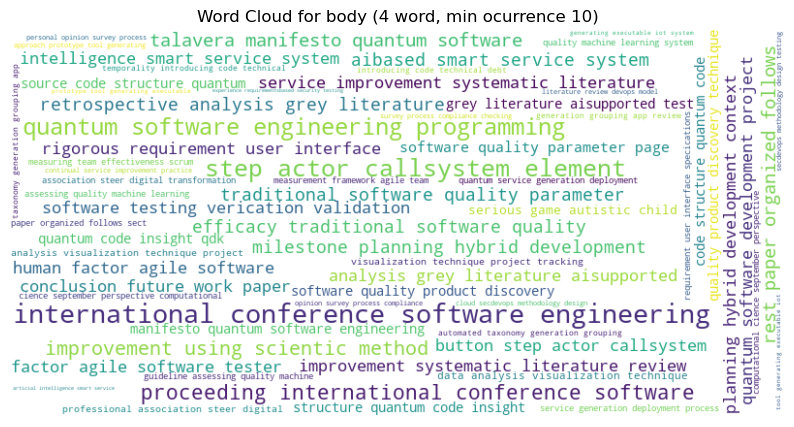

In [113]:
create_word_cloud(merged_text, 'Word Cloud for body (4 word, min ocurrence 10)', min_occurrence=9, number_of_words=4)